## Principal Components Analysis: Crabs data Example

Campbell (1974) studied rock crabs of the genus _leptograpsus_. One species, _L. variegatus_, had been split into two new species according to their colour: orange and blue. Preserved specimens lose their colour, so it was hoped that morphological differences would enable museum material to be classified.
Data are available on 50 specimens of each sex of each species. Each specimen has measurements on:

* the width of the frontal lobe `FL`,
* the rear width `RW`, 
* the length along the carapace midline `CL`,  
* the maximum width `CW` of the carapace, and 
* the body depth `BD` in mm.

in addition to colour/species and sex (we will treat the problem as unsupervised and will ignore these for now).

In [1]:
#header to make the figures look pretty
options(repr.plot.width=5, repr.plot.height=5)

In [10]:
library(MASS)
varnames<-c('FL','RW','CL','CW','BD')
Crabs <- crabs[,varnames];
head(Crabs[sample(50),])

,FL,RW,CL,CW,BD
12,12.3,11.0,26.8,31.5,11.4
2,8.8,7.7,18.1,20.8,7.4
8,11.6,9.1,24.5,28.4,10.4
39,17.1,12.7,36.7,41.9,15.6
43,18.0,13.7,39.2,44.4,16.2
49,19.8,14.3,42.4,48.9,18.3


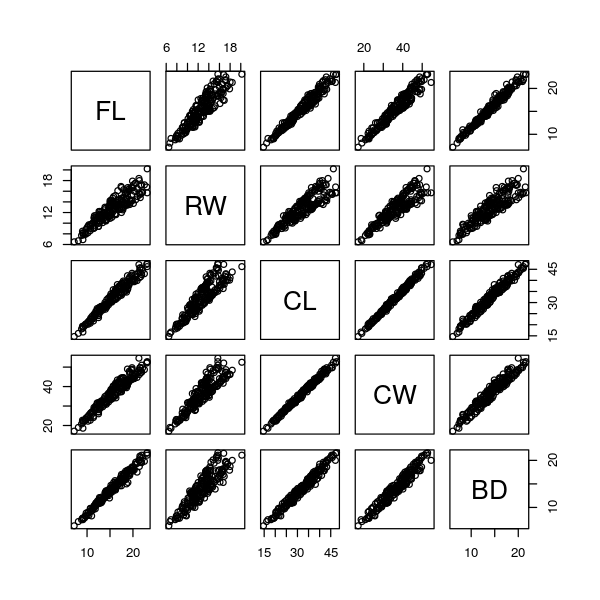

In [11]:
pairs(Crabs)

In [4]:
Crabs.pca <- princomp(Crabs)
summary(Crabs.pca)

Importance of components:
                           Comp.1      Comp.2      Comp.3       Comp.4
Standard deviation     11.8322521 1.135936870 0.997631086 0.3669098284
Proportion of Variance  0.9824718 0.009055108 0.006984337 0.0009447218
Cumulative Proportion   0.9824718 0.991526908 0.998511245 0.9994559672
                             Comp.5
Standard deviation     0.2784325016
Proportion of Variance 0.0005440328
Cumulative Proportion  1.0000000000

In [5]:
loadings(Crabs.pca)


Loadings:
   Comp.1 Comp.2 Comp.3 Comp.4 Comp.5
FL -0.289 -0.323  0.507  0.734  0.125
RW -0.197 -0.865 -0.414 -0.148 -0.141
CL -0.599  0.198  0.175 -0.144 -0.742
CW -0.662  0.288 -0.491  0.126  0.471
BD -0.284 -0.160  0.547 -0.634  0.439

               Comp.1 Comp.2 Comp.3 Comp.4 Comp.5
SS loadings       1.0    1.0    1.0    1.0    1.0
Proportion Var    0.2    0.2    0.2    0.2    0.2
Cumulative Var    0.2    0.4    0.6    0.8    1.0

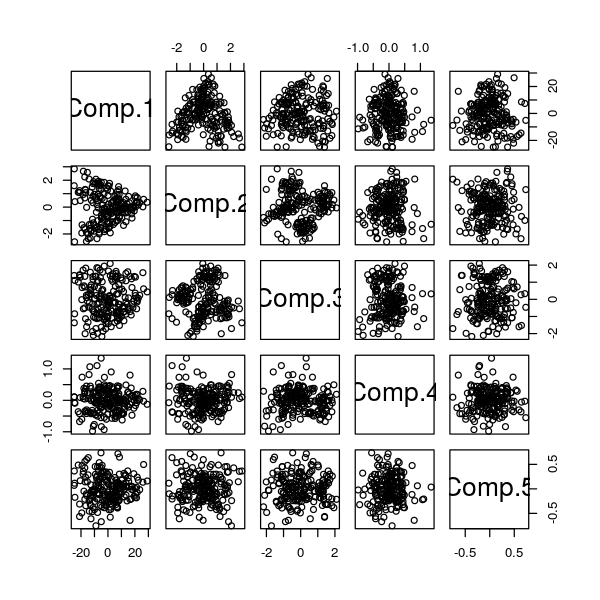

In [6]:
Crabs_proj <- predict(Crabs.pca) 
pairs(Crabs_proj)

What did we discover?

Let us use our label information (species+sex).

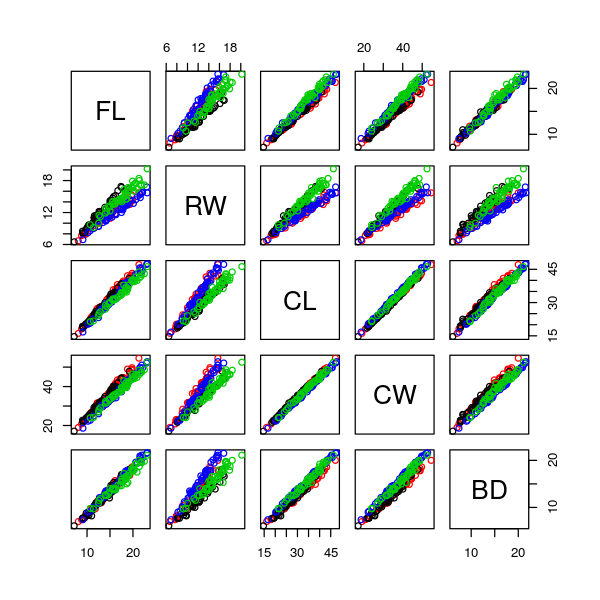

In [7]:
#pairwise plots of original data
Crabs.class <- factor(paste(crabs$sp,crabs$sex,sep=""))
pairs(Crabs,col=unclass(Crabs.class))

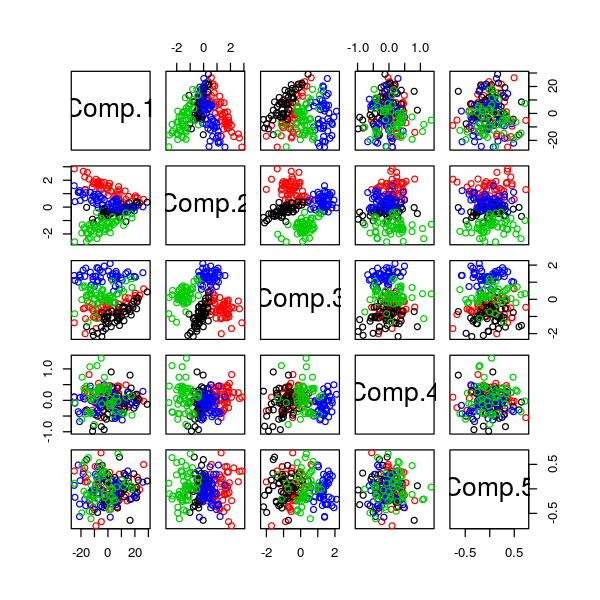

In [8]:
#pairwise plots of PCA projections
pairs(Crabs_proj,col=unclass(Crabs.class))

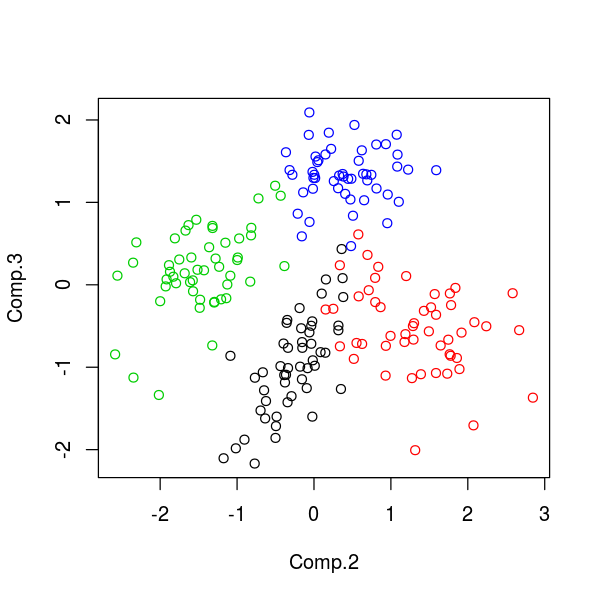

In [9]:
plot(Comp.3~Comp.2,data=Crabs_proj,col=unclass(Crabs.class))

The first principal component reflects the general size of the crab which is not informative about their species/sex. The second and third principal components, in contrast, appear to reflect exactly the variability which is due to species/sex.